Accuracy: 0.968609865470852
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



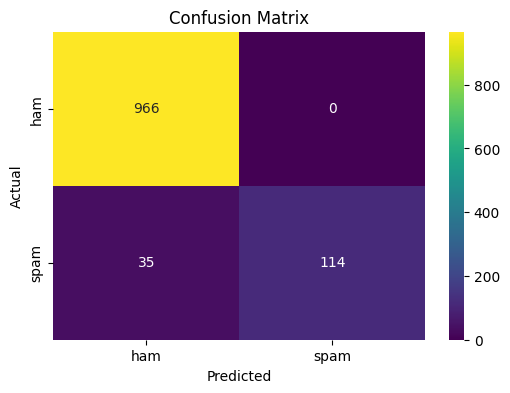

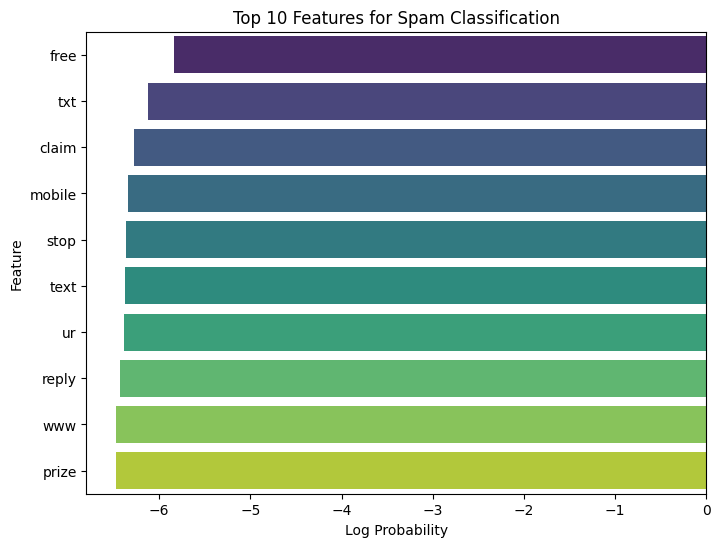

Accuracy: 0.968609865470852
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



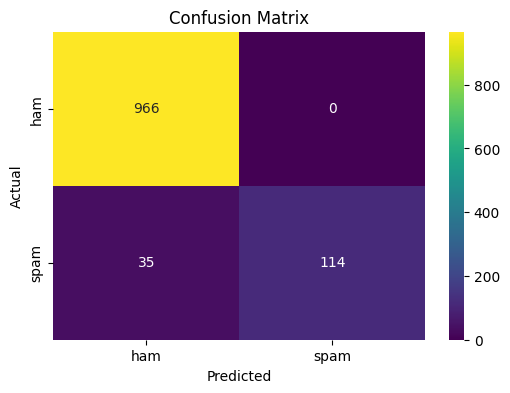

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_excel(r'../data/Spam_Email_Detection.xlsx')

# Clean the dataset by selecting only the relevant columns
data = data[['v1', 'v2']]
data.columns = ['Label', 'Text']

# Convert all non-string entries in the Text column to strings
data['Text'] = data['Text'].astype(str)

# Encode the labels
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['Text'], data['Label'], test_size=0.2, random_state=42, stratify=data['Label']
)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Decode the predicted labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the most important features for classification
feature_names = tfidf_vectorizer.get_feature_names_out()
spam_feature_log_prob = model.feature_log_prob_[1]
top_features_idx = spam_feature_log_prob.argsort()[-10:][::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=spam_feature_log_prob[top_features_idx], y=feature_names[top_features_idx], palette='viridis', hue=feature_names[top_features_idx], dodge=False, legend=False)
plt.title('Top 10 Features for Spam Classification')
plt.xlabel('Log Probability')
plt.ylabel('Feature')
plt.show()

# Function to evaluate model accuracy and display metrics
def evaluate_model(y_true, y_pred, labels):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=labels)
    
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{report}')
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate the model using the function
evaluate_model(y_test, y_pred, label_encoder.classes_)
